In [1]:
import os
import os.path
import sys 

from pathlib import Path
from glob import glob
from random import choice

import matplotlib.pyplot as plt
#import cv2
import numpy as np

In [2]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

2.5.0


In [3]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from ResNetModel import ResNet50Model

In [4]:
physical_devices = tf.config.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [5]:
# loading the directories 
datapath = "D:\\programing\\DataSets\\Classification\\natural_images"
dataset_path = Path(datapath)
list(dataset_path.iterdir())

[WindowsPath('D:/programing/DataSets/Classification/natural_images/data'),
 WindowsPath('D:/programing/DataSets/Classification/natural_images/natural_images')]

In [6]:
folders = glob(datapath+"/natural_images/*")
num_classes = len(folders)
print ('Total Classes = ' + str(num_classes))

Total Classes = 8


In [16]:
input_shape = (112,112,3)

In [17]:
training_datagen = ImageDataGenerator(
                                    rescale=1./255,   
                                    shear_range=0.2, 
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    validation_split=0.2)

training_generator = training_datagen.flow_from_directory( datapath+"/natural_images", target_size = input_shape[0:2], batch_size = 32, class_mode = 'categorical', subset='training')
validation_generator = training_datagen.flow_from_directory( datapath+"/natural_images", target_size = input_shape[0:2], batch_size = 32, class_mode = 'categorical', subset='validation')

Found 5522 images belonging to 8 classes.
Found 1377 images belonging to 8 classes.


(32, 112, 112, 3)
(32, 8)


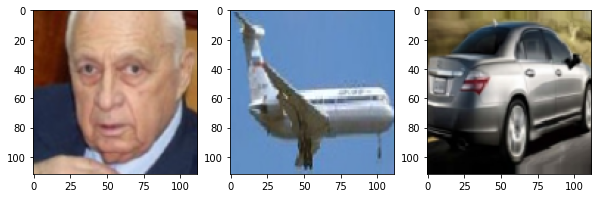

In [18]:
data = training_generator.__getitem__(1)

print(data[0].shape)
print(data[1].shape)

img = data[0]
plt.figure(figsize=(10,10))
for i in range(3):
    img = choice(data[0])
    plt.subplot(131+i)
    plt.imshow(img)

plt.show()


In [19]:

model = ResNet50Model(input_shape, out_channels=num_classes)

In [20]:
model.compile(optimizer='adam', loss='categorical_crossentropy' ,metrics=['accuracy'])

In [21]:
mc = ModelCheckpoint(mode='max', filepath='top-weights.h5', monitor='val_accuracy',save_best_only='True', save_weights_only='True', verbose=1)
es = EarlyStopping(mode='max', monitor='val_accuracy', patience=10, verbose=0, restore_best_weights=True)
rl = ReduceLROnPlateau(monitor='val_accuracy',factor=0.1,patience=5,verbose=1,mode="max",min_lr=0.0001)
callbacks=[mc,es,rl]

In [23]:
history = model.fit(training_generator, epochs=35,
                              validation_data=validation_generator,callbacks=callbacks)

Epoch 1/35
173/173 [==============================] - 80s 438ms/step - loss: 2.3126 - accuracy: 0.4558 - val_loss: 3.7522 - val_accuracy: 0.1285

Epoch 00001: val_accuracy improved from -inf to 0.12854, saving model to top-weights.h5
Epoch 2/35
173/173 [==============================] - 24s 136ms/step - loss: 0.9825 - accuracy: 0.7139 - val_loss: 2.4346 - val_accuracy: 0.3224

Epoch 00002: val_accuracy improved from 0.12854 to 0.32244, saving model to top-weights.h5
Epoch 3/35
173/173 [==============================] - 24s 137ms/step - loss: 1.0292 - accuracy: 0.7202 - val_loss: 14.3864 - val_accuracy: 0.3094

Epoch 00003: val_accuracy did not improve from 0.32244
Epoch 4/35
173/173 [==============================] - 24s 136ms/step - loss: 0.5932 - accuracy: 0.7854 - val_loss: 0.7508 - val_accuracy: 0.7734

Epoch 00004: val_accuracy improved from 0.32244 to 0.77342, saving model to top-weights.h5
Epoch 5/35
173/173 [==============================] - 24s 136ms/step - loss: 0.5670 - accu

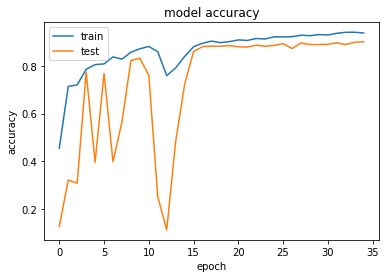

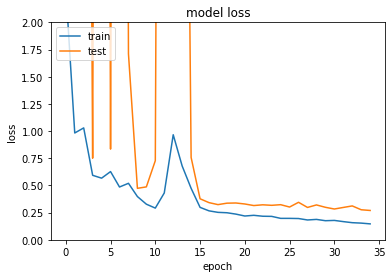

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylim([0,2])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()